This is the first version of the data visualization/parser.

In [1]:
%pip install osmnx
%pip install osm2geojson
import pandas as pd
import osmnx as ox
import geopandas as gpd
import osm2geojson
import codecs
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


/home/simonsigge/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Import data from maps xml file
graph = ox.graph_from_xml('data/map.osm')
geometries = ox.geometries_from_xml('data/map.osm')
geometries


name name:da name:ja name:ko name:nn  \
element_type osmid                                                           
node         27323968                 Lund    Lund     ルンド      룬드    Lund   
             27368367                  NaN     NaN     NaN     NaN     NaN   
             27368371               Lund C     NaN     NaN     NaN     NaN   
             27368381  Lund centralstation     NaN     NaN     NaN     NaN   
             27368503                  NaN     NaN     NaN     NaN     NaN   
...                                    ...     ...     ...     ...     ...   
relation     5150208                   NaN     NaN     NaN     NaN     NaN   
             5555489                   NaN     NaN     NaN     NaN     NaN   
             5555490                   NaN     NaN     NaN     NaN     NaN   
             8466886            Parentesen     NaN     NaN     NaN     NaN   
             15021533       Järnåkraskolan     NaN     NaN     NaN     NaN   

                      name:no name:ru name:sv name:yue name:zh  ... KOD80_82  \
element_type osmid                                              ...            
node         27323968    Lund    Лунд    Lund       隆德      隆德  ...      NaN   
             27368367     NaN     NaN     NaN      NaN     NaN  ...      NaN   
             27368371     NaN     NaN     NaN      NaN     NaN  ...      NaN   
             27368381     NaN     NaN     NaN      NaN     NaN  ...      NaN   
             27368503     NaN     NaN     NaN      NaN     NaN  ...      NaN   
...                       ...     ...     ...      ...     ...  ...      ...   
relation     5150208      NaN     NaN     NaN      NaN     NaN  ...      NaN   
             5555489      NaN     NaN     NaN      NaN     NaN  ...      NaN   
             5555490      NaN     NaN     NaN      NaN     NaN  ...      NaN   
             8466886      NaN     NaN     NaN      NaN     NaN  ...      NaN   
             15021533     NaN     NaN     NaN      NaN     NaN  ...      NaN   

                      KOD83_91 KOD92_94 KOD95_96 KOD97_97 KOD98_98 LANDAREAKM  \
element_type osmid                                                              
node         27323968      NaN      NaN      NaN      NaN      NaN        NaN   
             27368367      NaN      NaN      NaN      NaN      NaN        NaN   
             27368371      NaN      NaN      NaN      NaN      NaN        NaN   
             27368381      NaN      NaN      NaN      NaN      NaN        NaN   
             27368503      NaN      NaN      NaN      NaN      NaN        NaN   
...                        ...      ...      ...      ...      ...        ...   
relation     5150208       NaN      NaN      NaN      NaN      NaN        NaN   
             5555489       NaN      NaN      NaN      NaN      NaN        NaN   
             5555490       NaN      NaN      NaN      NaN      NaN        NaN   
             8466886       NaN      NaN      NaN      NaN      NaN        NaN   
             15021533      NaN      NaN      NaN      NaN      NaN        NaN   

                      official_name:en ref:scb          type  
element_type osmid                                            
node         27323968              NaN     NaN           NaN  
             27368367              NaN     NaN           NaN  
             27368371              NaN     NaN           NaN  
             27368381              NaN     NaN           NaN  
             27368503              NaN     NaN           NaN  
...                                ...     ...           ...  
relation     5150208               NaN     NaN  multipolygon  
             5555489               NaN     NaN  multipolygon  
             5555490               NaN     NaN  multipolygon  
             8466886               NaN     NaN  multipolygon  
             15021533              NaN     NaN  multipolygon  

[9011 rows x 413 columns]

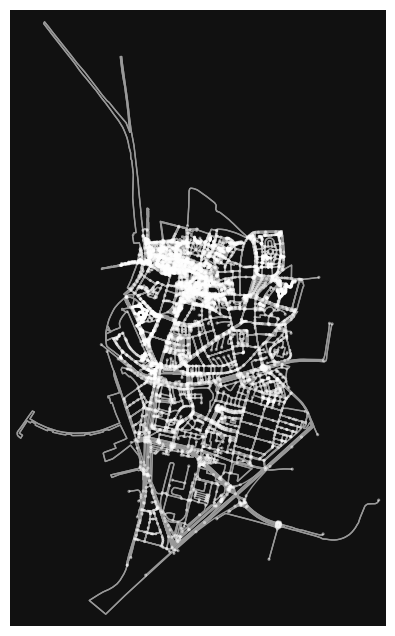

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [95]:
ox.plot_graph(graph,node_alpha=0.5,node_size=5)

In [3]:
multipolygon = geometries[geometries['type'] == 'multipolygon']['geometry']
pd.set_option('display.max_columns', 500)
df = multipolygon;
df

element_type  osmid   
relation      1308229     POLYGON ((13.19914 55.70293, 13.19915 55.70279...
              1323075     POLYGON ((13.20153 55.69585, 13.20160 55.69570...
              1323396     POLYGON ((13.19407 55.69392, 13.19407 55.69390...
              1364131     POLYGON ((13.19541 55.70219, 13.19539 55.70234...
              1401538     MULTIPOLYGON (((13.18955 55.70445, 13.18958 55...
              1423213     POLYGON ((13.18737 55.70247, 13.18748 55.70254...
              1423278     POLYGON ((13.18854 55.70327, 13.18860 55.70324...
              1686288     POLYGON ((13.19601 55.70407, 13.19606 55.70412...
              1686289     POLYGON ((13.19534 55.70370, 13.19514 55.70376...
              1690170     POLYGON ((13.19659 55.70107, 13.19657 55.70112...
              1746216     POLYGON ((13.18841 55.68854, 13.18868 55.68850...
              1998200     POLYGON ((13.19276 55.70397, 13.19282 55.70396...
              1998201     POLYGON ((13.19275 55.70435, 13.19275 5

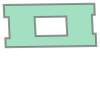

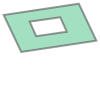

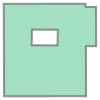

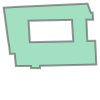

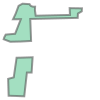

In [4]:
df.iloc[4]
#gpd.GeoSeries([polydiff])
for row in df.values[0:5]:  
    display(row)


<GeometryArray>
[          <shapely.geometry.polygon.Polygon object at 0x7f54f9c47d30>,
Length: 39, dtype: geometry


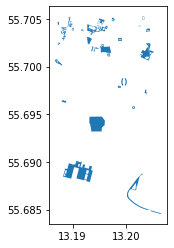

In [5]:
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
print(df.values)
myPoly = gpd.GeoSeries(df.values)
myPoly.plot()
plt.show()
